In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/ames_clean.csv', index_col='id')

In [3]:
df.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
109,60,RL,75.0,13517,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,...,0,0,No Pool,No Fence,No Misc Feature,0,3,2010,WD,130500
544,60,RL,43.0,11492,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,...,0,0,No Pool,No Fence,No Misc Feature,0,4,2009,WD,220000
153,20,RL,68.0,7922,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,No Misc Feature,0,1,2010,WD,109000
318,60,RL,73.0,9802,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,No Misc Feature,0,4,2010,WD,174000
255,50,RL,82.0,14235,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,No Misc Feature,0,3,2010,WD,138500


In [4]:
df['ms_subclass'] = df['ms_subclass'].astype('object')

In [5]:
obj_cols = df.select_dtypes('object').columns
num_cols = df.select_dtypes(exclude='object').columns

In [6]:
df.shape

(2016, 78)

In [7]:
df[num_cols].shape

(2016, 35)

/Users/timdwyer/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


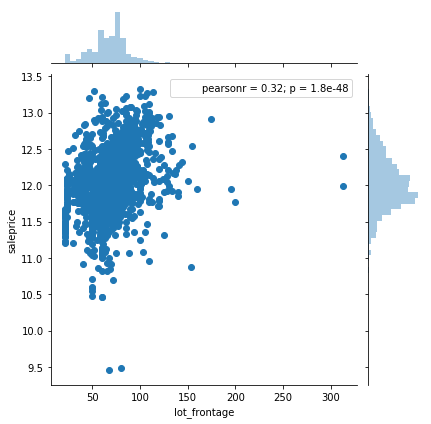

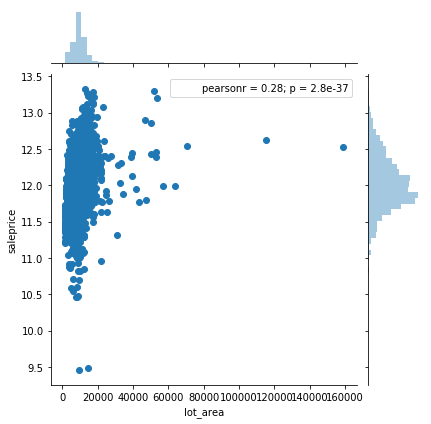

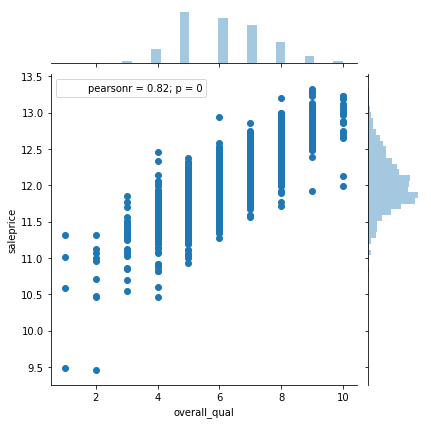

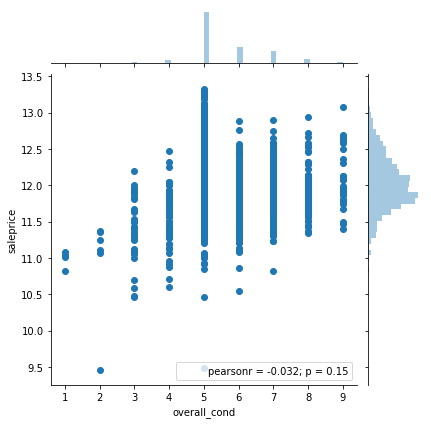

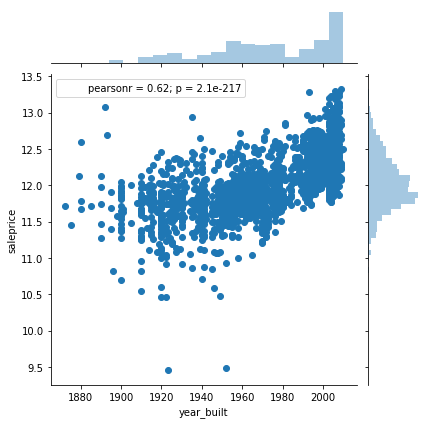

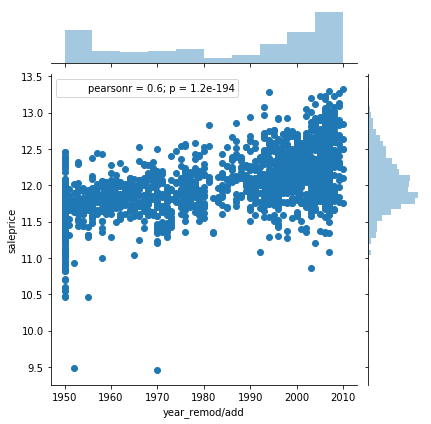

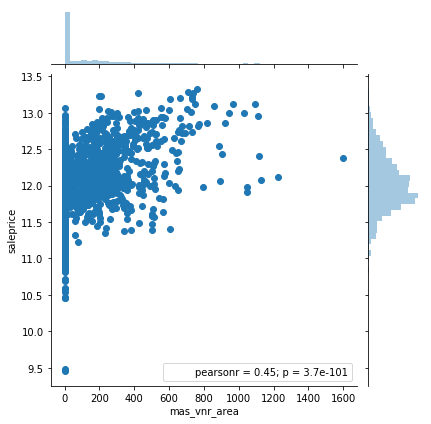

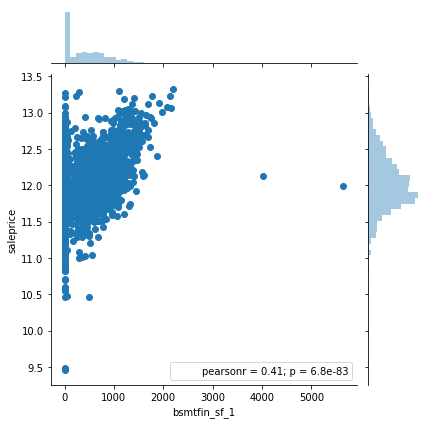

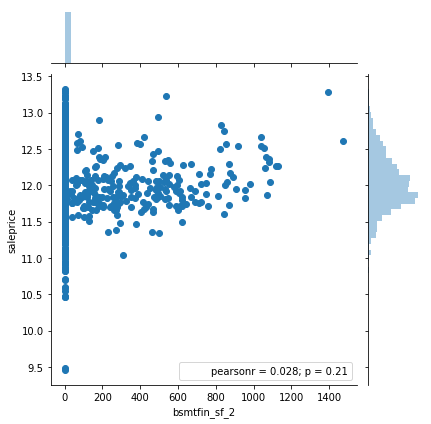

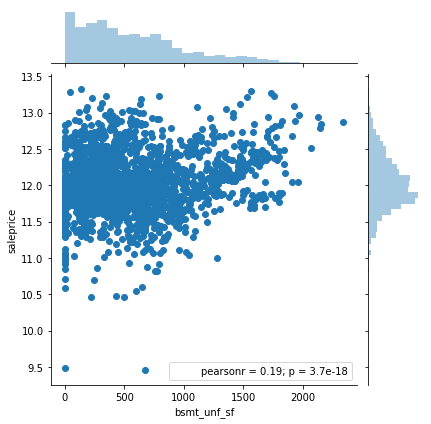

In [8]:
cols_type = num_cols[:10]
for col in cols_type:
    sns.jointplot(df[col], np.log1p(df['saleprice']))


/Users/timdwyer/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


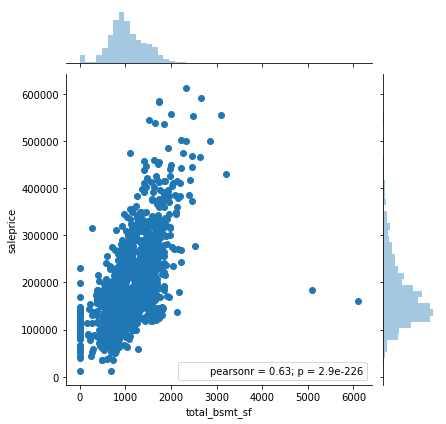

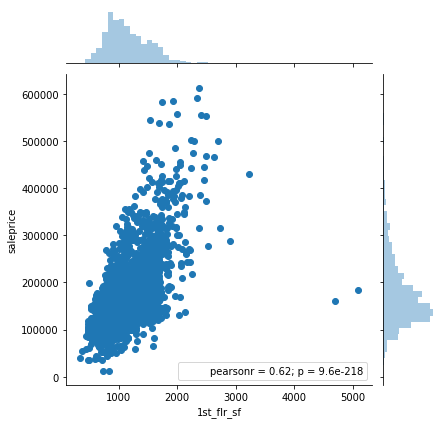

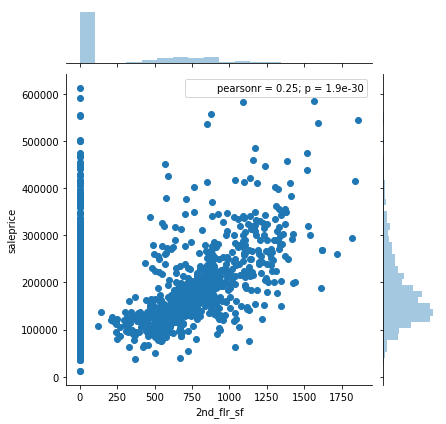

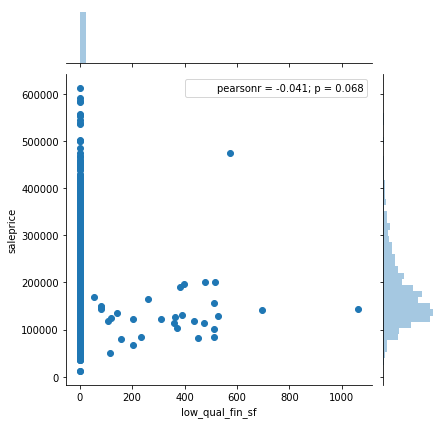

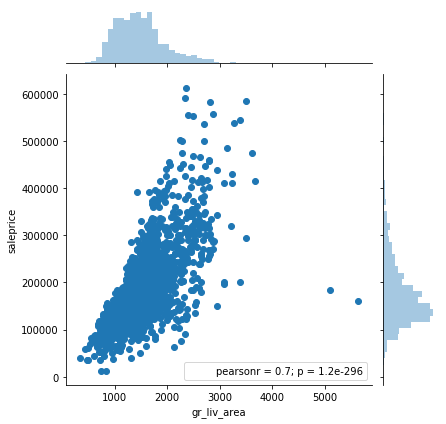

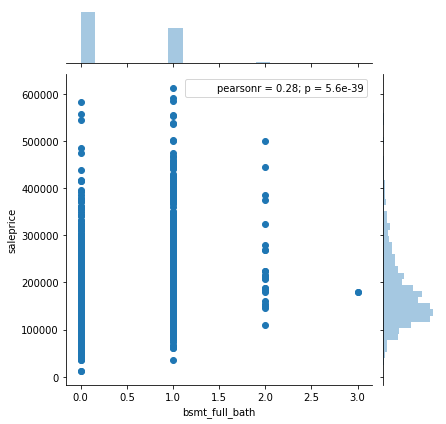

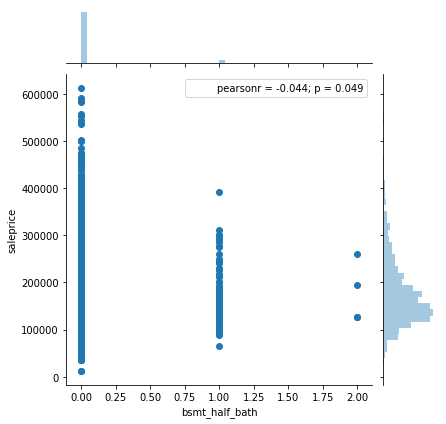

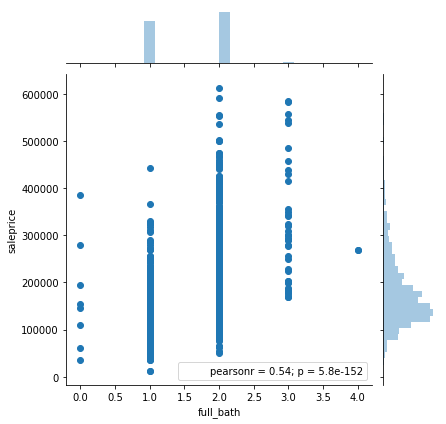

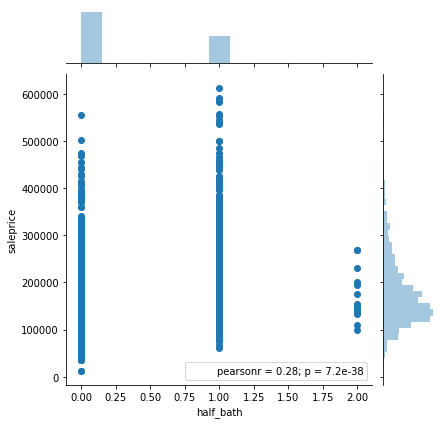

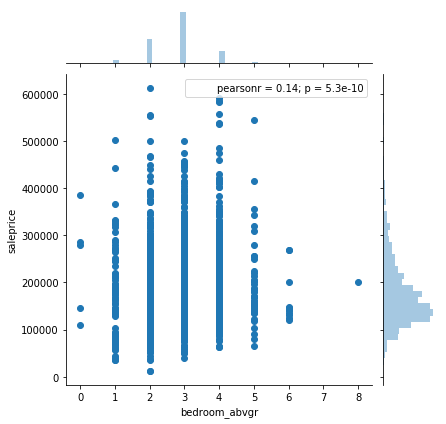

In [9]:
cols_type = num_cols[10:20]
for col in cols_type:
    sns.jointplot(df[col], df['saleprice'])


/Users/timdwyer/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


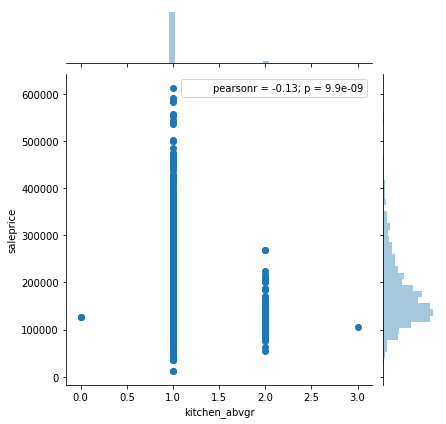

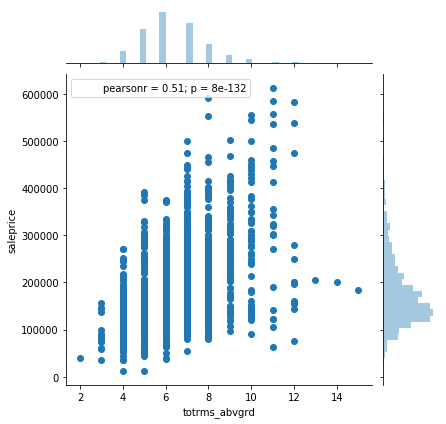

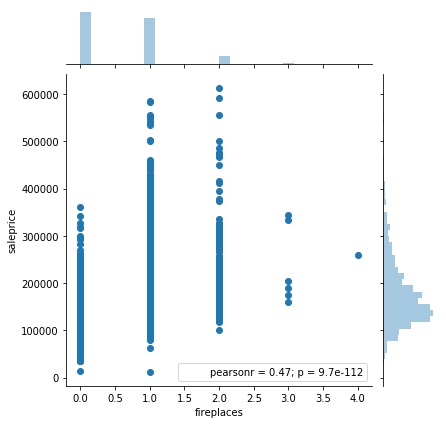

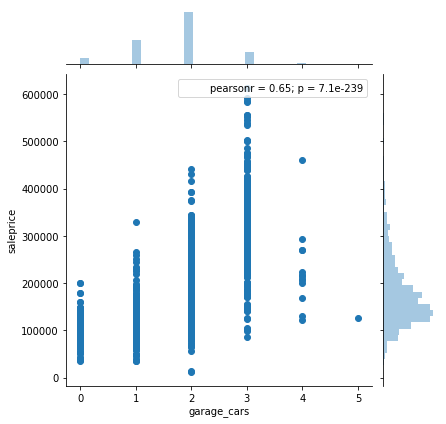

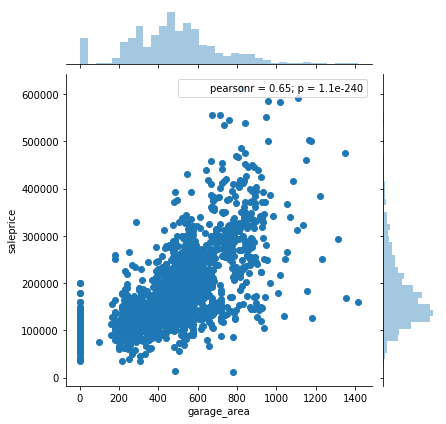

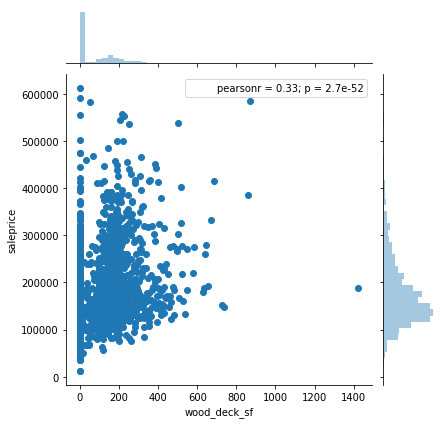

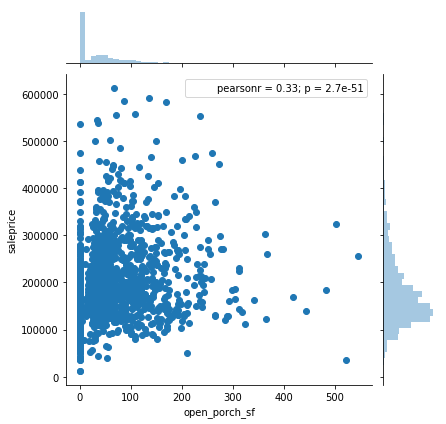

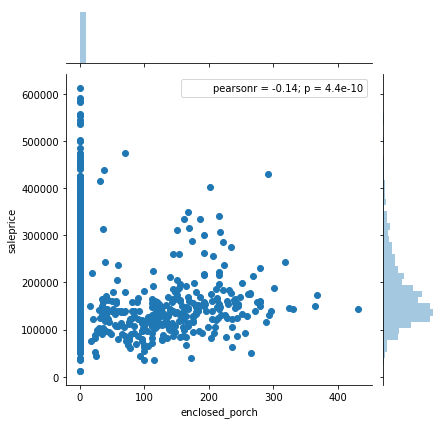

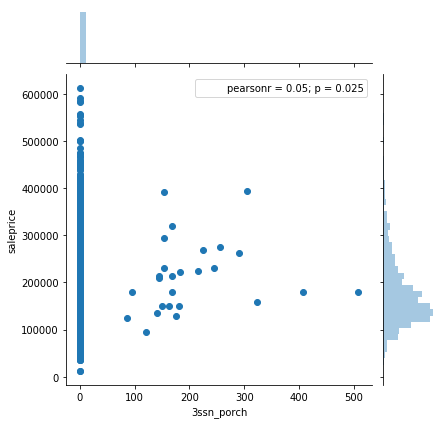

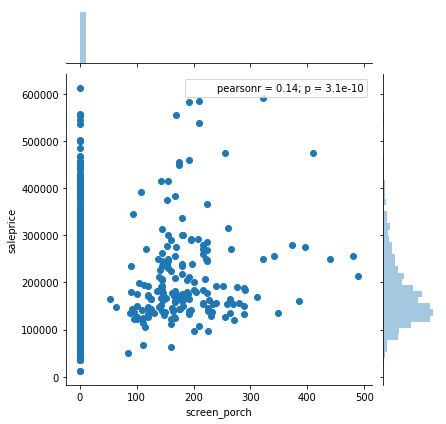

In [10]:
cols_type = num_cols[20:30]
for col in cols_type:
    sns.jointplot(df[col], df['saleprice'])


/Users/timdwyer/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


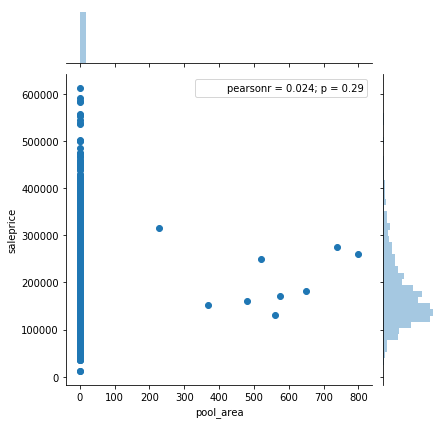

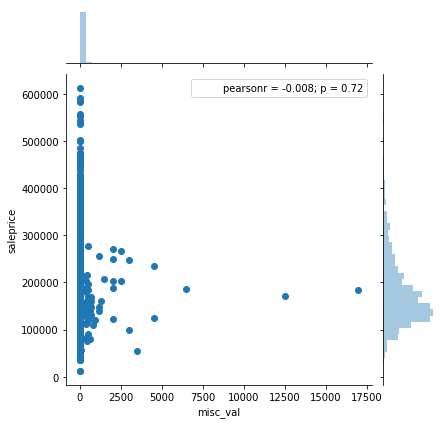

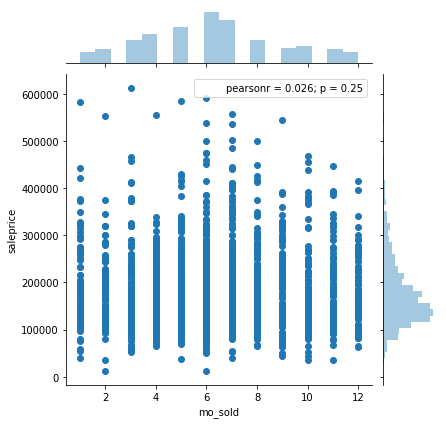

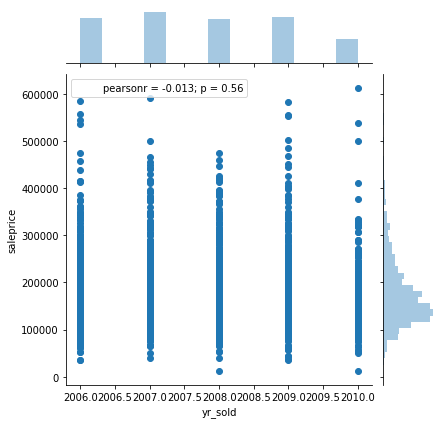

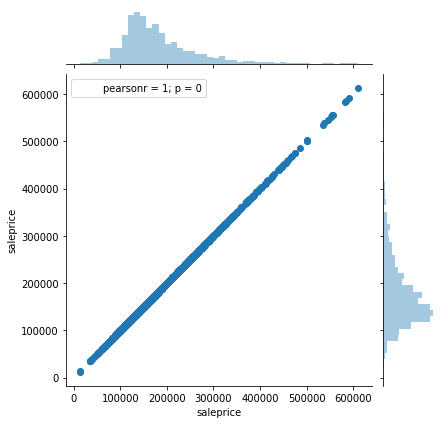

In [11]:
cols_type = num_cols[30:]
for col in cols_type:
    sns.jointplot(df[col], df['saleprice'])


In [16]:
from sklearn.linear_model import ElasticNetCV

In [17]:
num_cols

Index(['lot_frontage', 'lot_area', 'overall_qual', 'overall_cond',
       'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_cars',
       'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch',
       '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold',
       'yr_sold', 'saleprice'],
      dtype='object')

In [18]:
obj_cols

Index(['ms_subclass', 'ms_zoning', 'street', 'alley', 'lot_shape',
       'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood',
       'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond',
       'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating',
       'heating_qc', 'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object')

In [19]:
df['ms_subclass'].value_counts()

20     754
60     381
50     198
120    130
30     101
70      89
160     88
80      85
90      74
190     46
85      28
75      16
180     11
45      11
40       4
Name: ms_subclass, dtype: int64

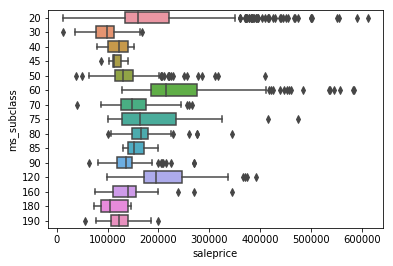

In [21]:
sns.boxplot(x='saleprice', y='ms_subclass', data=df, orient='h')

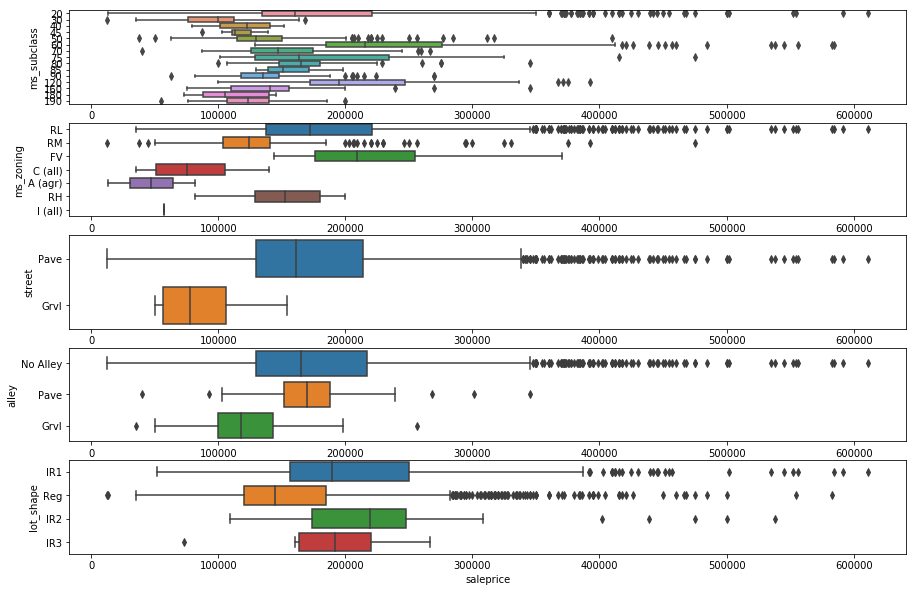

In [33]:
cols_plot = obj_cols[:5]

fig, ax = plt.subplots(nrows=len(cols_plot), figsize=(15,10))
for axis, col in zip(ax,cols_plot):
    sns.boxplot(x='saleprice', y=col, data=df, orient='h', ax=axis)
#     print(df['saleprice'].shape, df[col].shape)

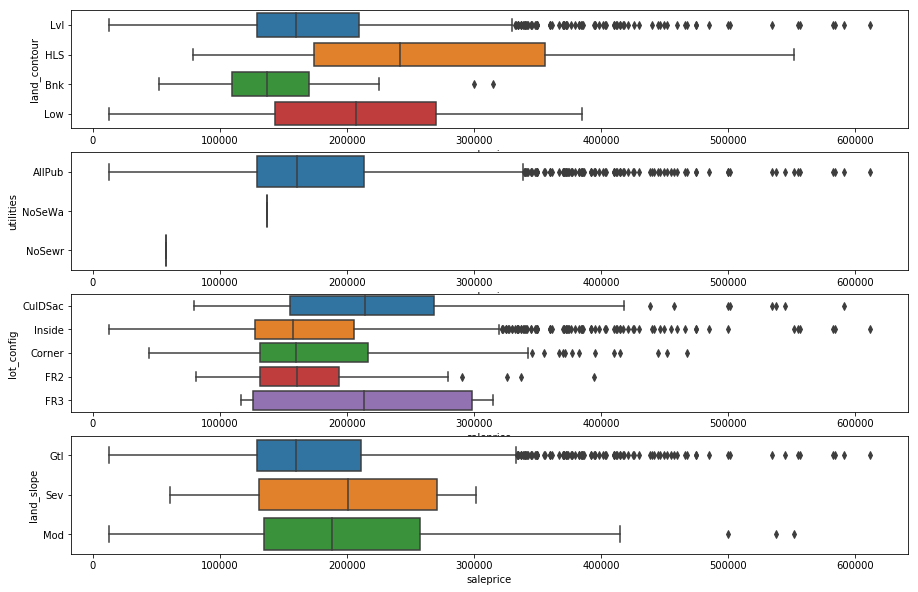

In [35]:
cols_plot = obj_cols[5:9]

fig, ax = plt.subplots(nrows=len(cols_plot), figsize=(15,10))
for axis, col in zip(ax,cols_plot):
    sns.boxplot(x='saleprice', y=col, data=df, orient='h', ax=axis)
#     print(df['saleprice'].shape, df[col].shape)

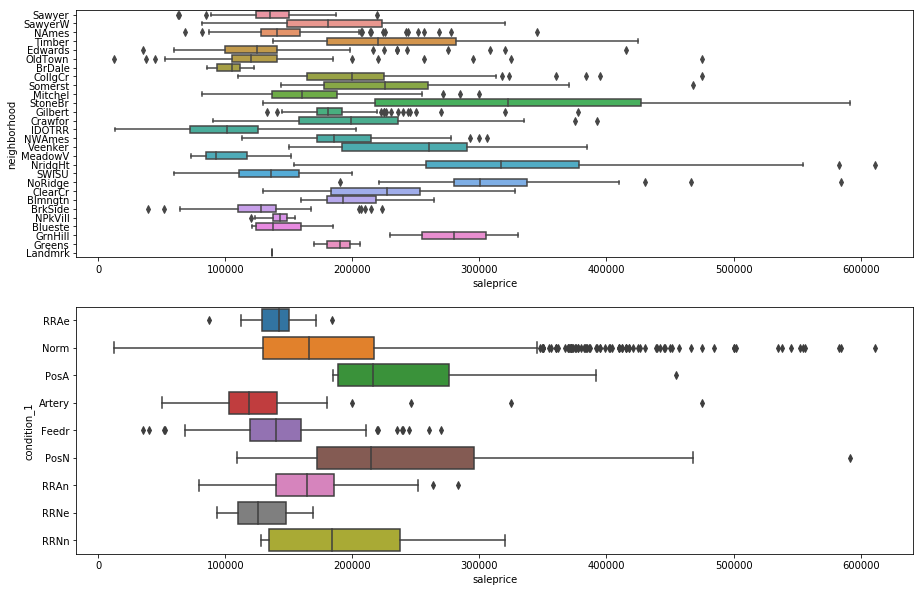

In [37]:
cols_plot = obj_cols[9:11]

fig, ax = plt.subplots(nrows=len(cols_plot), figsize=(15,10))
for axis, col in zip(ax,cols_plot):
    sns.boxplot(x='saleprice', y=col, data=df, orient='h', ax=axis)
#     print(df['saleprice'].shape, df[col].shape)

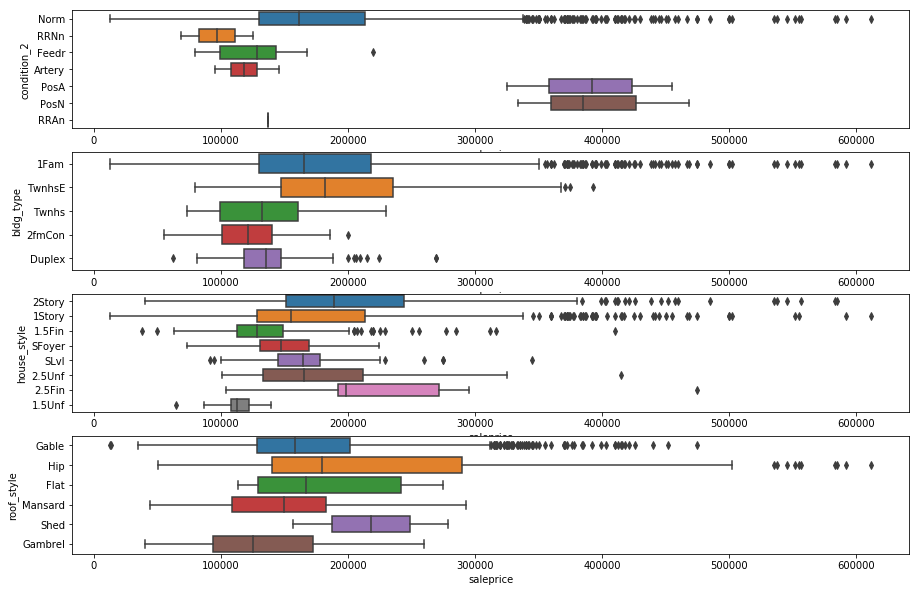

In [38]:
cols_plot = obj_cols[11:15]

fig, ax = plt.subplots(nrows=len(cols_plot), figsize=(15,10))
for axis, col in zip(ax,cols_plot):
    sns.boxplot(x='saleprice', y=col, data=df, orient='h', ax=axis)
#     print(df['saleprice'].shape, df[col].shape)

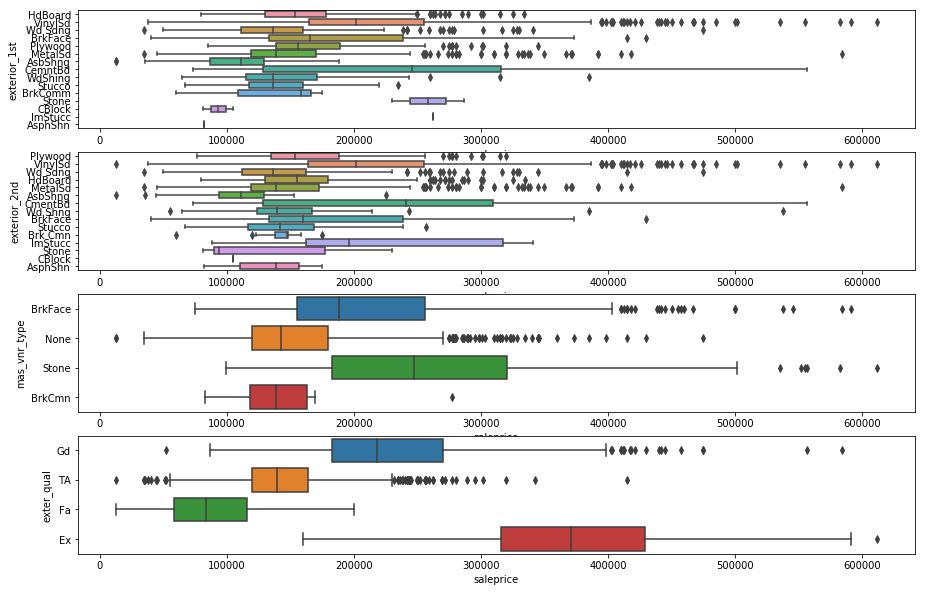

In [39]:
cols_plot = obj_cols[16:20]

fig, ax = plt.subplots(nrows=len(cols_plot), figsize=(15,10))
for axis, col in zip(ax,cols_plot):
    sns.boxplot(x='saleprice', y=col, data=df, orient='h', ax=axis)
#     print(df['saleprice'].shape, df[col].shape)